In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

from dateutil.relativedelta import relativedelta as rd

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()


['measurement', 'station']

In [6]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()



# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
recent_dt=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_dt)

('2017-08-23',)


2016-08-24


Text(0.5, 1.0, 'Precipitation over one year')

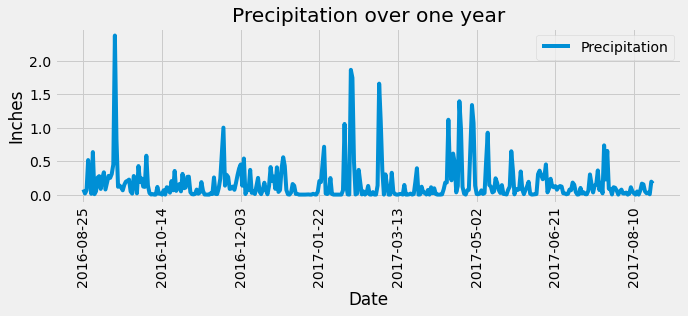

In [111]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_ago_dt = dt.date(2017, 8 ,23)-dt.timedelta(days=364)
print(year_ago_dt)


# Perform a query to retrieve the data and precipitation scores
one_yr_data = session.query(Measurement.id,Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs).filter(Measurement.date> '2016-08-24').\
                filter(Measurement.date< '2017-08-23').all()

# test the data by printing
#for row in one_yr_data:
#    print (row)

# Save the query results as a Pandas DataFrame and set the index to the date column
one_yr_df = pd.DataFrame(one_yr_data, columns = ['id', 'station', 'date','prcp','tobs'])
one_yr_df.set_index('date',inplace=True)


# Sort the dataframe by date
one_yr_df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data

# Use DataFrame.plot() in order to create a bar chart of the data
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

one_yr_plot = one_yr_df.groupby("date").mean().reset_index()

x_axis = one_yr_plot["date"]
y_axis = one_yr_plot["prcp"]
pandas1 = pd.DataFrame({"Date":one_yr_plot["date"],"Precipitation":one_yr_plot["prcp"]}).set_index("Date")

# Use DataFrame.plot() in order to create a bar chart of the data
pandas1.plot(kind="line", figsize=(10,3), rot=90)
plt.ylabel("Inches")

# Set a title for the chart
plt.title("Precipitation over one year")

In [110]:
# Use Pandas to calcualte the summary statistics for the precipitation data
one_yr_df.describe()


,id,prcp,tobs
count,2212.000000,2005.000000,2212.000000
mean,10159.568264,0.172424,74.559222
std,5603.900677,0.453190,4.611807
min,2366.000000,0.000000,58.000000
25%,5287.750000,0.000000,71.000000
50%,8931.500000,0.020000,75.000000
75%,14752.250000,0.130000,78.000000
max,19549.000000,6.700000,87.000000


# Exploratory Station Analysis

In [75]:
# Design a query to calculate the total number stations in the dataset

station_count=session.query(Station.id).count()
print(station_count)

9


In [82]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

st_count = session.query(Measurement.station, func.count(Measurement.id)).\
            group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
for row in st_count:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [101]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print("Temperature stats for Station: USC00519281")
print("Highest Temperature: "+str(high_temp))
print("Lowest Temperature: "+str(low_temp))
print("Average Temperature: "+str(avg_temp))

Temperature stats for Station: USC00519281
Highest Temperature: [(85.0,)]
Lowest Temperature: [(54.0,)]
Average Temperature: [(71.66378066378067,)]


Text(0.5, 1.0, 'Temperature pattern over one year for station: USC00519281')

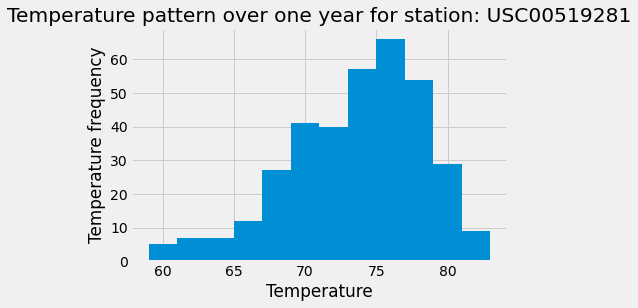

In [108]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#calculate recent date the measurement was taken for the most active station
recent_dt2 = session.query(Measurement.date).filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()

#calculate the date one year ago
yr_ago_dt = dt.date(2017, 8 ,18)-dt.timedelta(days=364)

#print(yr_ago_dt)

#Filter data for last 12 months
one_yr_data2 = session.query(Measurement.id,Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs).filter(Measurement.date> '2016-08-19').\
                filter(Measurement.date< '2017-08-18').filter(Measurement.station=='USC00519281').all()
# test the data by printing
#for row in one_yr_data2:
#    print (row)

# Save the query results as a Pandas DataFrame and set the index to the date column
one_yr_df2 = pd.DataFrame(one_yr_data2, columns = ['id', 'station', 'date','prcp','tobs'])
one_yr_df2.set_index('date',inplace=True)


# Sort the dataframe by date
one_yr_df2.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data

# Use DataFrame.plot() in order to create a bar chart of the data
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

one_yr_plot2 = one_yr_df2.groupby("date").mean().reset_index()

#x_axis = one_yr_plot2["date"]
#y_axis = one_yr_plot2["prcp"]
#pandas2 = pd.DataFrame({"Date":one_yr_plot2["date"],"Precipitation":one_yr_plot2["prcp"]}).set_index("Date")

# Use DataFrame.plot() in order to create a bar chart of the data

one_yr_df2.hist(column='tobs',bins=12)
plt.xlabel("Temperature")
plt.ylabel("Temperature frequency")
# Set a title for the chart
plt.title("Temperature pattern over one year for station: USC00519281")


# Close session

In [ ]:
# Close Session
session.close()